In [57]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize

## Problem 1: Hartree-Fock for Helium

I don't really understand how to solve this without finite differences. Check Thissen tomorrow!

## Problem 2: The Poisson Equation

The Hartree potential is generated by the charge distribution: 

$$ V_H(r) = \int dr' \frac{n(r')}{|r-r'|} \rightarrow \nabla^2 V_H(r) = -4\pi n(r)$$

The ground state density of the helium atom is $n(r) = 2n_s(r) = 2 |\varphi(r)|^2$ where $n_s$ is the density for one orbital (one electron). Introducing the electro-static potential $\nabla^2 V_{sH}(r) = -4\pi n_s(r)$ and using $U(r) = r V_{sH}(r)$ as well as $u(r) = \sqrt{4 \pi n_s(r)} = \sqrt{4\pi} r \varphi(r)$ we can write the Poisson equation on the form

$$ \frac{d^2}{dr^2}U(r) = -\frac{u^2(r)}{r}, \hspace{10px} U(0) = 0, U(r_{max}) = 1 $$.

Finally, using $U_0(r) = U(r) - r/r_{max}$ we obtain 

$$ \frac{d^2}{dr^2}U_0(r) = -\frac{u^2(r)}{r}, \hspace{10px} U_0(0) = 0, U_0(r_{max}) = 0 $$.

We wish to solve this for $U(r)$. Rewriting using the finite difference method, we obtain the following system off equations (written on diagonal form utilizing the boundary conditions on $U_0$) (on N points $i\in(1,N)):

$$ A' U_0' = B$$
with

\begin{equation}
    A' = 
    \begin{bmatrix}
        -2 & 1 & 0 & 0 & 0 \\
         1 & -2 & 1 & 0 & 0 \\
         0 & 1 & -2 & 1 & 0 \\
        ... \\
    \end{bmatrix}
\end{equation},

\begin{equation}
    B = 
    \begin{bmatrix}
        b(r_1) = - 4 \pi h^2 |\varphi(r_1)|^2 r_1 - 0\\
        b(r_2) \\
        b(r_3) \\
        ... \\
    \end{bmatrix}
\end{equation}

We use Hartree units, such that $m_e = 1, e = 1, \hbar=1, 4\pi\epsilon_0 = 1, a_0=1$.

Text(0, 0.5, '$V(r)$')

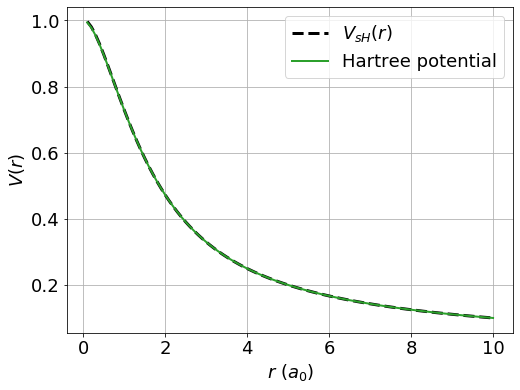

In [68]:
def helium_ground_state(r):
    return 1/np.pi * np.exp(-2*r)

def hart_pot(r):
    return 1/r - (1+1/r)*np.exp(-2*r)

N = 100 # Number of  points
h = 0.1
r = np.array([(i+1)*h for i in range(N)]) # N points between endpoints
phi_dens = helium_ground_state(r)
B = -np.array([4*np.pi*h**2*phi_dens[i]*r[i] for i in range(N)])
A_p = np.zeros((N,N)) + np.diagflat(-2*np.ones(N), k=0) + np.diagflat(np.ones(N-1), k=1) + np.diagflat(np.ones(N-1), k=-1)

U0_p = np.linalg.solve(A_p, B) # Solve the system of equations for U_0
# TODO pad with zeros to get boundary?
rmax = r[-1] + h  # The endpoint distance
U = U0_p + r/rmax # Extract U
V = U/r # Extract the static potential

# PLot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(r, V, color='k', linestyle='--', linewidth=3, label=r'$V_{sH}(r)$')
ax.plot(r, hart_pot(r), color='C2', linestyle='-', linewidth=2, label='Hartree potential')
ax.legend(loc='best')
ax.grid()
ax.set_xlabel(r'$r$ $(a_0)$')
ax.set_ylabel(r'$V(r)$')